In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv("./Salary_Data.csv")
print(len(data))
data.head(10)

30


,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


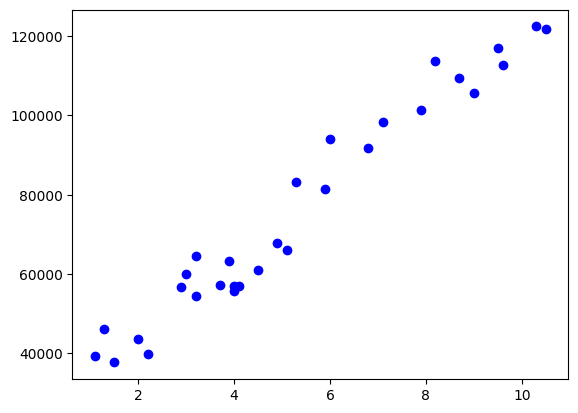

In [3]:
##Plot the data
plt.scatter(data["YearsExperience"], data["Salary"], color='blue', label='data')
plt.show()

Length of train data is 21
Length of test data is 9
Model output [[9558.90680961]]
Model output [25458.80235742]


/tmp/ipykernel_3809/536172697.py:37: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  plt.fill_between(X_train.ravel(), (y_pred_train - confidence_interval_1sd).flatten(), (y_pred_train + confidence_interval_1sd).flatten(),
/tmp/ipykernel_3809/536172697.py:39: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  plt.fill_between(X_train.ravel(), (y_pred_train - confidence_interval_2sd).flatten(), (y_pred_train + confidence_interval_2sd).flatten(),


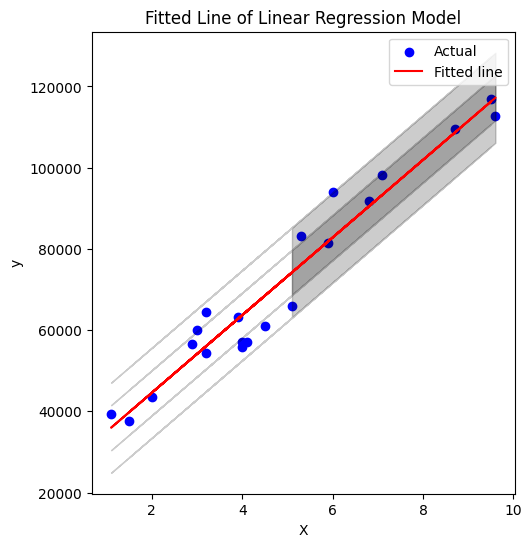

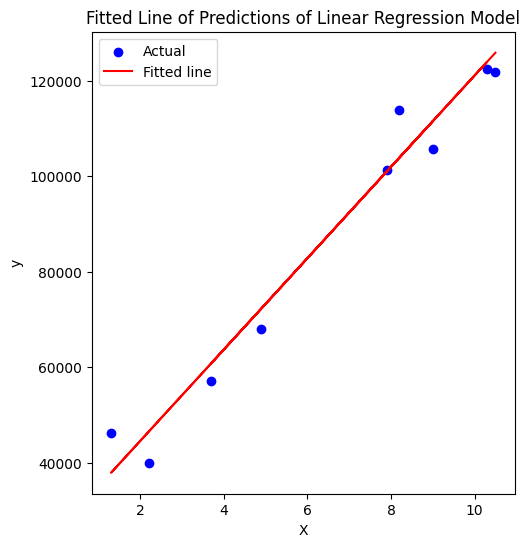

In [4]:
##Prepare data for training and testing
X = data["YearsExperience"]
y =  data["Salary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
print(f"Length of train data is {len(X_train)}")
print(f"Length of test data is {len(X_test)}")

#*********** Train Data **************************
##Train the model and plot the training output
model = LinearRegression().fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))
print(f"Model output {model.coef_}")
print(f"Model output {model.intercept_}")
y_pred_train = model.predict(X_train.values.reshape(-1,1))
residuals = y_train.values.reshape(-1,1) - y_pred_train
std_residuals = np.std(residuals)

# Calculate confidence intervals for 1 and 2 standard deviations
confidence_interval_1sd = 1.0 * std_residuals
confidence_interval_2sd = 2.0 * std_residuals


plt.figure(figsize=(12, 6)) 

# Plot the data points
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Actual')

# Plot the fitted line
plt.plot(X_train, y_pred_train, color='red', label='Fitted line')

plt.title('Fitted Line of Linear Regression Model')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()


plt.fill_between(X_train.ravel(), (y_pred_train - confidence_interval_1sd).flatten(), (y_pred_train + confidence_interval_1sd).flatten(), 
                 color='black', alpha=0.2, label='1 SD')
plt.fill_between(X_train.ravel(), (y_pred_train - confidence_interval_2sd).flatten(), (y_pred_train + confidence_interval_2sd).flatten(), 
                 color='black', alpha=0.2, label='2 SD')
plt.show()

#*********** Test Data **************************
plt.figure(figsize=(12, 6)) 
y_pred_test = model.predict(X_test.values.reshape(-1,1)) 
# Plot the test output
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', label='Actual')

# Plot the fitted line
plt.plot(X_test, y_pred_test, color='red', label='Fitted line')

plt.title('Fitted Line of Predictions of Linear Regression Model')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [5]:
def calculateSumOfSquareError(y_actual, y_pred):
    square_error = (y_pred - y_actual) ** 2
    sum_square_error = sum(square_error)
    return( sum_square_error/(2 * len(y_pred)) )

In [6]:
mse_result = calculateSumOfSquareError( y_train.values.reshape(-1,1), y_pred_train)
print(f"Mean Sum of Squared error of training data model fit is {mse_result} using custom function")
mse = mean_squared_error(y_train.values.reshape(-1,1), y_pred_train)
print(f"Mean Sum of Squared error of training data model fit is {mse} using built-in function")

Mean Sum of Squared error of training data model fit is [15365612.43412321] using custom function
Mean Sum of Squared error of training data model fit is 30731224.86824643 using built-in function


In [7]:
print((y_pred_train - confidence_interval_1sd).flatten())

[ 50035.03620913  99659.30902864  89161.86670144  33811.71624891
  51943.66208681 112065.37723352 119699.88074421  64349.73029168
  40491.90682077 121608.50662189  86298.92788493 104430.87372283
  96796.37021213  59578.1655975   71984.23380238  49080.7232703
  42400.53269844  78664.42437423  58623.85265866  56715.22678099
  51943.66208681]


### Single Linear Regression end to end implementation using Gradient Descent

In [16]:
def gradientDescent(x, y):
    w = 0
    b = 0
    iterate = 100
    alpha = 1.0e-2
    
    iteration_hist = []
    cost_hist = []
    
    for i in range(iterate):
        #print(f"Iteration {i}: Running Gradient Descent iteration with w = {w} and b = {b}")
        iteration_hist.append(i)
        y_pred = w * x + b
        mse = calculateSumOfSquareError(y, y_pred)
        cost_hist.append(mse)
        #print(f"Sum of squared errors = {mse}")
        derivative_w = (np.sum((y_pred - y) * x))/len(x)
        derivative_b = (np.sum((y_pred - y)))/len(x)
        w = w - (alpha * derivative_w)
        b = w - (alpha * derivative_b)

    print(f"Final w = {w} and b={b}")
    return w, b, iteration_hist, cost_hist

Final w = 11823.694476233883 and b=11850.421395662912
mean square error of my fun 67102235.020680815


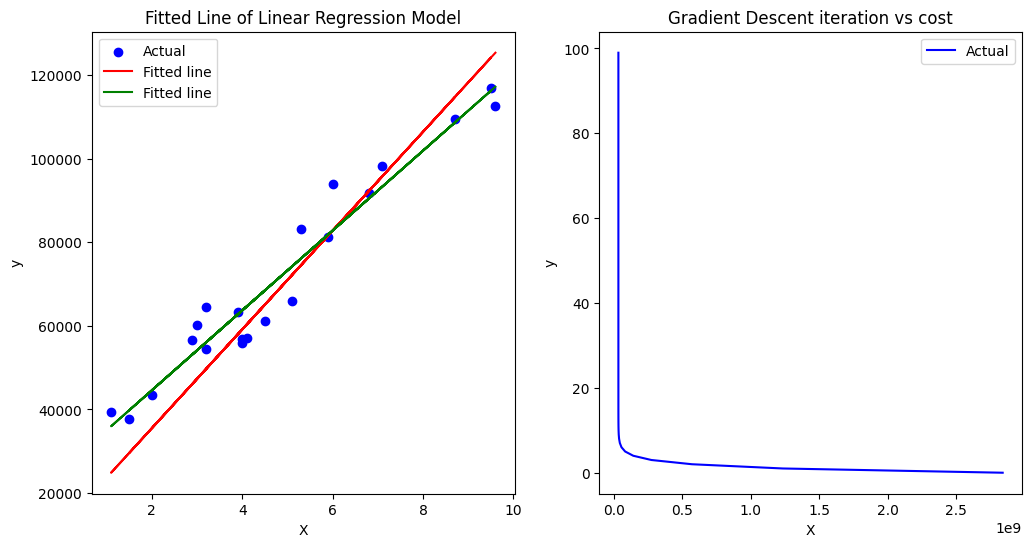

In [17]:
## Test the output and compare it with built in linear regression model line

x = X_train.values
y = y_train.values
w, b, iteration_hist, cost_hist = gradientDescent(x, y)

## predict using calculated value
y_pred_myfun = w * x + b

mse = mean_squared_error(y, y_pred_myfun)
print(f"mean square error of my fun {mse}")

plt.figure(figsize=(12, 6)) 

# Plot the data points
plt.subplot(1, 2, 1)
plt.scatter(x, y, color='blue', label='Actual')

# Plot the fitted line
plt.plot(x, y_pred_myfun, color='red', label='Fitted line')
plt.plot(x, y_pred_train, color='green', label='Fitted line')

plt.title('Fitted Line of Linear Regression Model')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()


# Plot iteration vs cost
plt.subplot(1, 2, 2)
plt.plot(cost_hist, iteration_hist, color='blue', label='Actual')

plt.title('Gradient Descent iteration vs cost')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()


